<a href="https://colab.research.google.com/github/VishruthVS/ML_Lab/blob/main/5/Iris_Dataset/NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset Naive Bayes Classifier Results

Results for K=3
Split 30-70 Accuracy:0.86

Results for K=5
Split 50-50 Accuracy:0.95

Results for K=7
Split 70-30 Accuracy:0.93

Results for K=9
Split 90-10 Accuracy:0.93


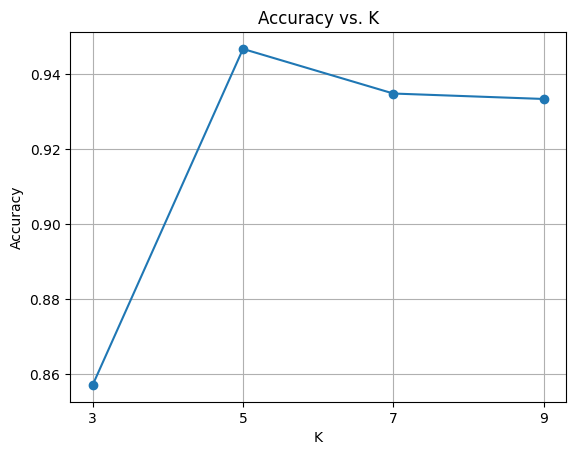

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class NaiveBayesclassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, x, y):
        n_samples, n_features = x.shape
        classes = np.unique(y)
        for class_label in classes:
            class_indices = y == class_label
            class_probability = class_indices.sum() / n_samples
            self.class_probabilities[class_label] = class_probability
            class_data = x[class_indices]
            feature_probabilities = {}
            for feature in range(n_features):
                unique_values, counts = np.unique(class_data[:, feature], return_counts=True)
                feature_probabilities[feature] = {'value': unique_values, 'probabilities': counts / len(class_indices)}
            self.feature_probabilities[class_label] = feature_probabilities

    def predict(self, x):
        predictions = []
        for sample in x:
            max_prob = -1
            predicted_class = None
            for class_label, class_probability in self.class_probabilities.items():
                posterior = class_probability
                for feature, feature_value in enumerate(sample):
                    if feature_value in self.feature_probabilities[class_label][feature]['value']:
                        feature_probability_index = np.where(self.feature_probabilities[class_label][feature]['value'] == feature_value)[0][0]
                        feature_probability = self.feature_probabilities[class_label][feature]['probabilities'][feature_probability_index]
                        posterior *= feature_probability
                    else:
                        posterior *= 0.01
                if posterior > max_prob:
                    max_prob = posterior
                    predicted_class = class_label
            predictions.append(predicted_class)
        return predictions

def evaluate_naive_bayes(dataset, target_col, K_values):
    accuracies = []
    for K in K_values:
        print(f"\nResults for K={K}")
        x_train, x_test, y_train, y_test = train_test_split(
            dataset.drop(columns=[target_col]), dataset[target_col],
            test_size=(1 - K / 10), random_state=42)
        clf = NaiveBayesclassifier()
        clf.fit(x_train.values, y_train.values)
        y_pred = clf.predict(x_test.values)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Split {K * 10}-{100 - K * 10} Accuracy:{accuracy:.2f}")

    # Plotting the accuracies
    plt.plot(K_values, accuracies, marker='o')
    plt.title('Accuracy vs. K')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.xticks(K_values)
    plt.grid(True)
    plt.show()

# Load Iris dataset
iris_data = pd.read_csv('iris.csv')

# Print Iris Dataset Naive Bayes Classifier Results
print("Iris Dataset Naive Bayes Classifier Results")
evaluate_naive_bayes(iris_data, 'type', [3, 5, 7, 9])
